In [1]:
import numpy as np
import sklearn
import autosklearn.classification
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import shutil
import tempfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def evaluate(model, X_test_features, y_test):
    y_pred = model.predict(X_test_features)
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Test Accuracy: {accuracy_test}")
    print(f'Mean Squared Error: {mse:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_pred, y_test)
    class_labels = ['NORMAL', 'PNEUMONIA']
    
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix For AutoML - Wavelet')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=class_labels)
    print(report)


In [3]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet/y_test.npy"

In [4]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

### Without Feature Reduction

[WARNING] [2023-11-22 01:42:07,686:Client-AutoML(1):d14e2215-88b6-11ee-9fe8-b496916b807c] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.
Val Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.3717948717948718
Mean Squared Error: 0.63


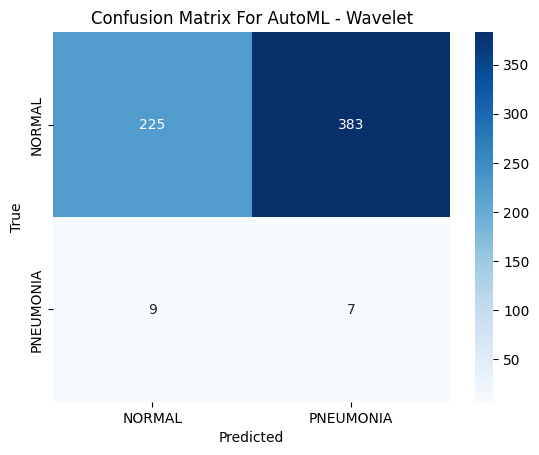

              precision    recall  f1-score   support

      NORMAL       0.37      0.96      0.53       234
   PNEUMONIA       0.44      0.02      0.03       390

    accuracy                           0.37       624
   macro avg       0.40      0.49      0.28       624
weighted avg       0.41      0.37      0.22       624

auto-sklearn results:
  Dataset name: d14e2215-88b6-11ee-9fe8-b496916b807c
  Metric: accuracy
  Best validation score: 0.961092
  Number of target algorithm runs: 26
  Number of successful target algorithm runs: 17
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 6
  Number of target algorithms that exceeded the memory limit: 3



In [18]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=60,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_features, y_train)
    y_pred_val = automl_classifier.predict(X_val_features)
    
    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Val Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_features, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### Experimenting on 100 Features

In [6]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/Wavelet_100/y_test.npy"

In [7]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

Val Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.3717948717948718
Mean Squared Error: 0.63


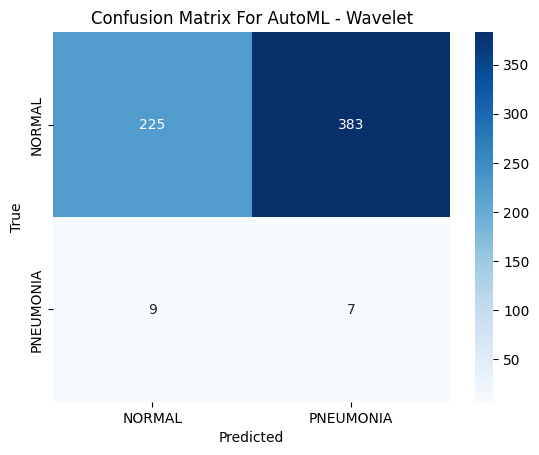

              precision    recall  f1-score   support

      NORMAL       0.37      0.96      0.53       234
   PNEUMONIA       0.44      0.02      0.03       390

    accuracy                           0.37       624
   macro avg       0.40      0.49      0.28       624
weighted avg       0.41      0.37      0.22       624

auto-sklearn results:
  Dataset name: 9419e296-88b5-11ee-9fe8-b496916b807c
  Metric: accuracy
  Best validation score: 0.961092
  Number of target algorithm runs: 87
  Number of successful target algorithm runs: 62
  Number of crashed target algorithm runs: 4
  Number of target algorithms that exceeded the time limit: 15
  Number of target algorithms that exceeded the memory limit: 6



In [13]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=300, # 5 minutes
        per_run_time_limit=60, # 1 minute
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_features, y_train)
    y_pred_val = automl_classifier.predict(X_val_features)
    
    # Evaluate the model on the test set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Val Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_features, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())    

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### LDA

In [19]:
# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_features)
X_val_std = scaler.transform(X_val_features)
X_test_std = scaler.transform(X_test_features)

In [20]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Set the desired number of components
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_val_lda = lda.transform(X_val_std)
X_test_lda = lda.transform(X_test_std)

[WARNING] [2023-11-22 01:43:29,194:Client-AutoML(1):01d8c7fb-88b7-11ee-9fe8-b496916b807c] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.
[WARNING] [2023-11-22 01:43:32,272:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-22 01:43:32,417:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-22 01:43:32,935:Client-EnsembleBuilder] No runs were available to build an ensemble from
Val Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.38301282051282054
Mean Squared Error: 0.62


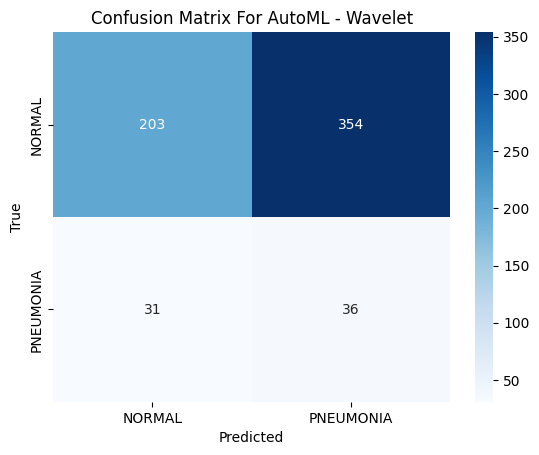

              precision    recall  f1-score   support

      NORMAL       0.36      0.87      0.51       234
   PNEUMONIA       0.54      0.09      0.16       390

    accuracy                           0.38       624
   macro avg       0.45      0.48      0.34       624
weighted avg       0.47      0.38      0.29       624

auto-sklearn results:
  Dataset name: 01d8c7fb-88b7-11ee-9fe8-b496916b807c
  Metric: accuracy
  Best validation score: 0.961092
  Number of target algorithm runs: 39
  Number of successful target algorithm runs: 26
  Number of crashed target algorithm runs: 13
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [21]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=60,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_lda, y_train)
    y_pred_val = automl_classifier.predict(X_val_lda)
    
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Val Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_lda, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### PCA

In [22]:
scaled_X_train = scaler.fit_transform(X_train_features)
scaled_X_val = scaler.transform(X_val_features)
scaled_X_test = scaler.transform(X_test_features)

pca = PCA(n_components=16)

X_train_pca = pca.fit_transform(scaled_X_train)
X_val_pca = pca.fit_transform(scaled_X_val)
X_test_pca = pca.fit_transform(scaled_X_test)

print(X_train_pca.shape)
print(X_val_pca.shape)
print(X_test_pca.shape)

(5216, 16)
(16, 16)
(624, 16)


[WARNING] [2023-11-22 01:44:28,345:Client-AutoML(1):2522a950-88b7-11ee-9fe8-b496916b807c] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.
Val Accuracy: 0.5
Mean Squared Error: 0.50
Test Accuracy: 0.5641025641025641
Mean Squared Error: 0.44


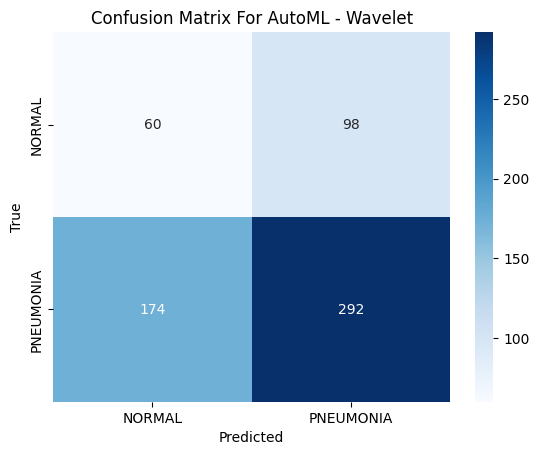

              precision    recall  f1-score   support

      NORMAL       0.38      0.26      0.31       234
   PNEUMONIA       0.63      0.75      0.68       390

    accuracy                           0.56       624
   macro avg       0.50      0.50      0.49       624
weighted avg       0.53      0.56      0.54       624

auto-sklearn results:
  Dataset name: 2522a950-88b7-11ee-9fe8-b496916b807c
  Metric: accuracy
  Best validation score: 0.937282
  Number of target algorithm runs: 24
  Number of successful target algorithm runs: 17
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 7
  Number of target algorithms that exceeded the memory limit: 0



In [23]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=60,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_pca, y_train)
    y_pred_val = automl_classifier.predict(X_val_pca)
    
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Val Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_pca, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

### T-SNE

In [24]:
# Fit the scaler on the training data and transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train_features)
X_val_scaled = scaler.transform(X_val_features)
X_test_scaled = scaler.transform(X_test_features)

# Apply t-SNE to reduce the dimensionality to 2D for scaled data
tsne = TSNE(n_components=2,perplexity=5)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_val_tsne = tsne.fit_transform(X_val_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

[WARNING] [2023-11-22 01:45:49,458:Client-AutoML(1):558037f9-88b7-11ee-9fe8-b496916b807c] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.
Val Accuracy: 0.6875
Mean Squared Error: 0.31
Test Accuracy: 0.6089743589743589
Mean Squared Error: 0.39


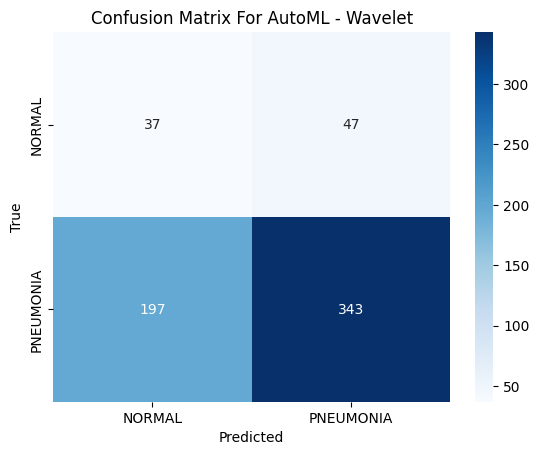

              precision    recall  f1-score   support

      NORMAL       0.44      0.16      0.23       234
   PNEUMONIA       0.64      0.88      0.74       390

    accuracy                           0.61       624
   macro avg       0.54      0.52      0.49       624
weighted avg       0.56      0.61      0.55       624

auto-sklearn results:
  Dataset name: 558037f9-88b7-11ee-9fe8-b496916b807c
  Metric: accuracy
  Best validation score: 0.942509
  Number of target algorithm runs: 34
  Number of successful target algorithm runs: 32
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [25]:
temp_dir_path = tempfile.mkdtemp()

try:
    # Clean up the temporary directory before running auto-sklearn
    shutil.rmtree(temp_dir_path, ignore_errors=True)

    # Define the auto-sklearn classifier
    automl_classifier = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=60,
        per_run_time_limit=30,
        ensemble_kwargs={'ensemble_size': 1},
        n_jobs=-1,
        tmp_folder=temp_dir_path,
        delete_tmp_folder_after_terminate=False  # Set this to True if you want to delete the temporary folder after training
    )
    
    # Make predictions on the val set
    automl_classifier.fit(X_train_tsne, y_train)
    y_pred_val = automl_classifier.predict(X_val_tsne)
    
    # Evaluate the model on the val set
    accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"Val Accuracy: {accuracy_val}")
    print(f'Mean Squared Error: {mse_val:.2f}')

    # Evalutaing the model on the test set
    evaluate(automl_classifier, X_test_tsne, y_test)

    # Print the auto-sklearn statistics
    print(automl_classifier.sprint_statistics())

finally:
    # Clean up the temporary directory
    shutil.rmtree(temp_dir_path, ignore_errors=True)

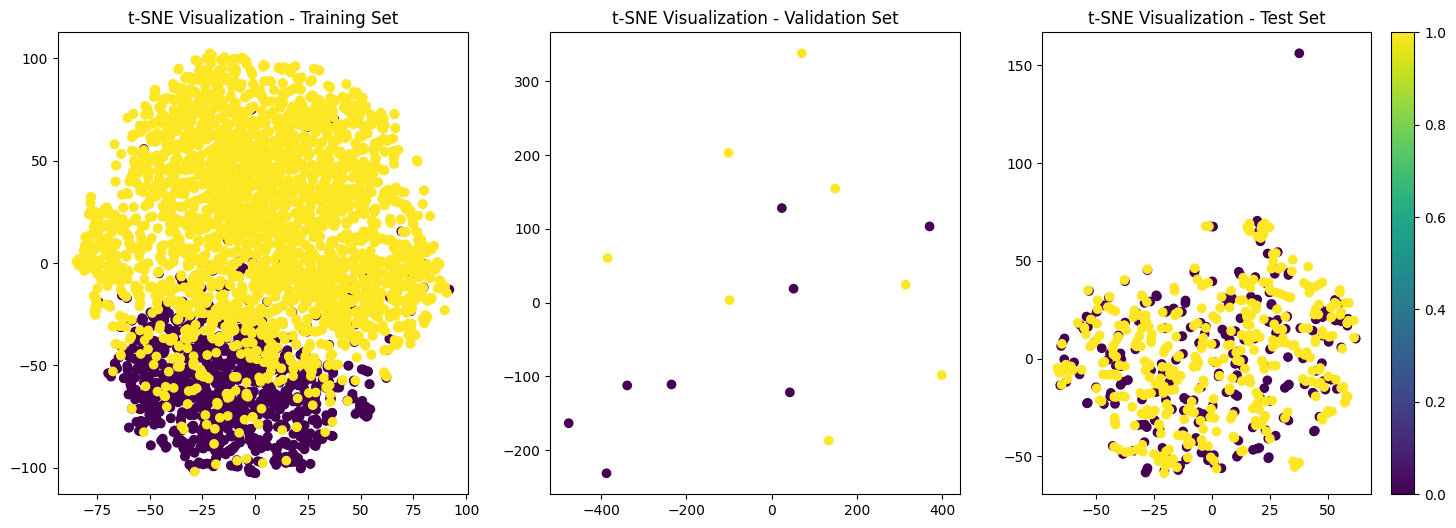

In [26]:
# Create scatter plots for training, validation, and test sets
# (similar to the previous example)
# Create scatter plots for training, validation, and test sets
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Visualization - Training Set')

plt.subplot(1, 3, 2)
plt.scatter(X_val_tsne[:, 0], X_val_tsne[:, 1], c=y_val, cmap='viridis')
plt.title('t-SNE Visualization - Validation Set')

plt.subplot(1, 3, 3)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE Visualization - Test Set')

plt.colorbar()
plt.show()